In [1]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import scipy.optimize as opt
import statsmodels.api as sm

%matplotlib inline
plt.style.use('bmh')

# Data

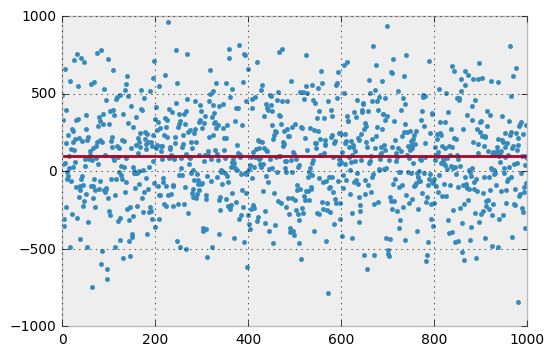

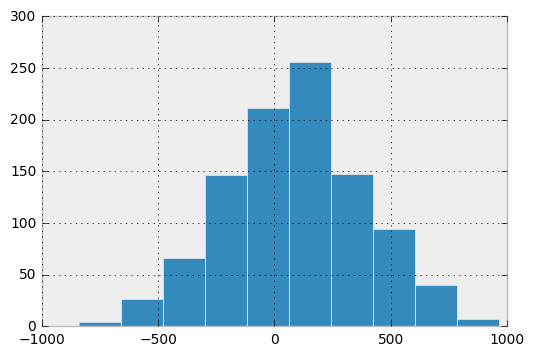

In [39]:
x = np.arange(1000)
y_mean = 100
y_std = 300
y = np.random.normal(loc=y_mean, scale=y_std, size=len(x))
plt.plot(x, y, '.',
         x, np.ones(len(x))*y_mean)
plt.figure()
_ = plt.hist(y)

# Model

In [40]:
# an pyMC3 model ..
with pm.Model() as model:
    # starting with uniform distribution
    mu = pm.Normal('mu', mu=1, sd=100)
    sd = pm.Normal('sd', mu=1, sd=100)
          
    Y = pm.Normal('Y', mu=mu, sd=sd, observed=y)
          
    start = pm.find_MAP()    
    step = pm.NUTS()
    
    trace = pm.sample(2000, step, start=start, progressbar=True)

100%|██████████| 2000/2000 [02:31<00:00, 41.26it/s]


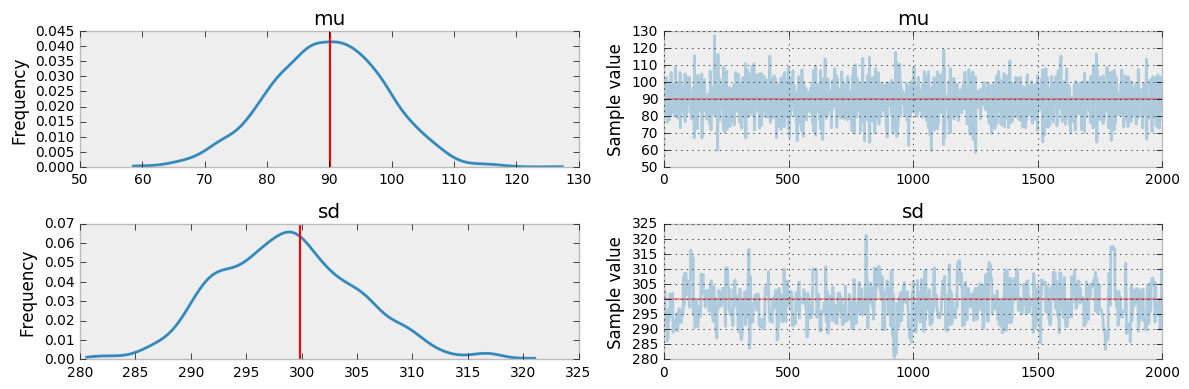

In [41]:
_ = pm.traceplot(trace, 
                 varnames=['mu', 'sd'],
                 lines={'mu': np.mean(y), 'sd': np.std(y)})

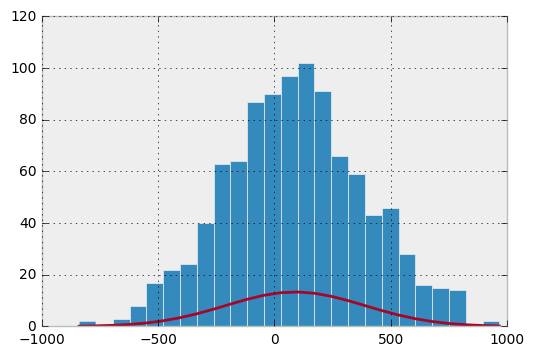

In [43]:
import matplotlib.mlab as mlab

mu_res = trace.get_values('mu')
sd_res = trace.get_values('sd')

burnin = int(.2*len(mu_res))

_, bins, _ = plt.hist(y, bins=25)
res = mlab.normpdf(bins, 
                   np.mean(mu_res[burnin:]),
                   np.mean(sd_res[burnin:]))
_ = plt.plot(bins, res*1e4)
